# 🧱 Concrete Strength Regression with Regularization
Polynomial regression on real-world concrete data using Ridge, Lasso, and ElasticNet.

# Concrete Compressive Strength Prediction

## Task Description:
Use the Concrete Compressive Strength dataset to model the relationship between cement content and concrete strength using polynomial regression. Additionally, investigate the effect of regularization.

1. In this task, we will work with a real dataset on concrete compressive strength.
The goal is to practice polynomial regression modeling and to investigate the impact of ridge regularization on the model.

The "Concrete Compressive Strength" dataset contains information about concrete strength depending on various concrete mixture components.
**Data source:** https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

### Data structure
The CSV file contains the following columns:
- **Cement (kg in a m³ mixture):** Amount of cement in the concrete mixture (kg per cubic meter).
- **Blast Furnace Slag (kg in a m³ mixture):** Amount of blast furnace slag in the concrete mixture (kg per cubic meter).
- **Fly Ash (kg in a m³ mixture):** Amount of fly ash in the concrete mixture (kg per cubic meter).
- **Water (kg in a m³ mixture):** Amount of water in the concrete mixture (kg per cubic meter).
- **Superplasticizer (kg in a m³ mixture):** Amount of superplasticizer in the concrete mixture (kg per cubic meter).
- **Coarse Aggregate (kg in a m³ mixture):** Amount of coarse aggregate in the concrete mixture (kg per cubic meter).
- **Fine Aggregate (kg in a m³ mixture):** Amount of fine aggregate in the concrete mixture (kg per cubic meter).
- **Age (day):** Age of the concrete in days.
- **Concrete compressive strength (MPa):** Compressive strength of concrete (in MPa).

### Instructions

- **Download the data:**
Download the Concrete Compressive Strength CSV file and save it in your working directory.

- **Load the data:**
Load the data into a Jupyter Notebook using the pandas library.

- **Select features and label:**
Select the Cement column as the feature (X) and the Concrete compressive strength column as the label (y).

- **Split the data:**
Split the dataset into training and test sets.

- **Polynomial regression without regularization:**
Perform polynomial (quadratic) regression without regularization on the training set and test it on the test set.

- **Polynomial regression with ridge regularization:**
Perform polynomial (quadratic) regression with ridge regularization for various values of the parameter α on the training set and test on the test set.

- **Compare results:**
Compare both methods using error metrics (MSE) and visualization of prediction results as well as any other known metrics. Based on this, select the best model.


In [11]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Load the dataset from UCI repository
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets['Concrete compressive strength']

# metadata
# print(concrete_compressive_strength.metadata)

# variable information
print(concrete_compressive_strength.variables.head)
print(X.head)

<bound method NDFrame.head of                             name     role        type demographic description  \
0                         Cement  Feature  Continuous        None        None   
1             Blast Furnace Slag  Feature     Integer        None        None   
2                        Fly Ash  Feature  Continuous        None        None   
3                          Water  Feature  Continuous        None        None   
4               Superplasticizer  Feature  Continuous        None        None   
5               Coarse Aggregate  Feature  Continuous        None        None   
6                 Fine Aggregate  Feature  Continuous        None        None   
7                            Age  Feature     Integer        None        None   
8  Concrete compressive strength   Target  Continuous        None        None   

    units missing_values  
0  kg/m^3             no  
1  kg/m^3             no  
2  kg/m^3             no  
3  kg/m^3             no  
4  kg/m^3             no

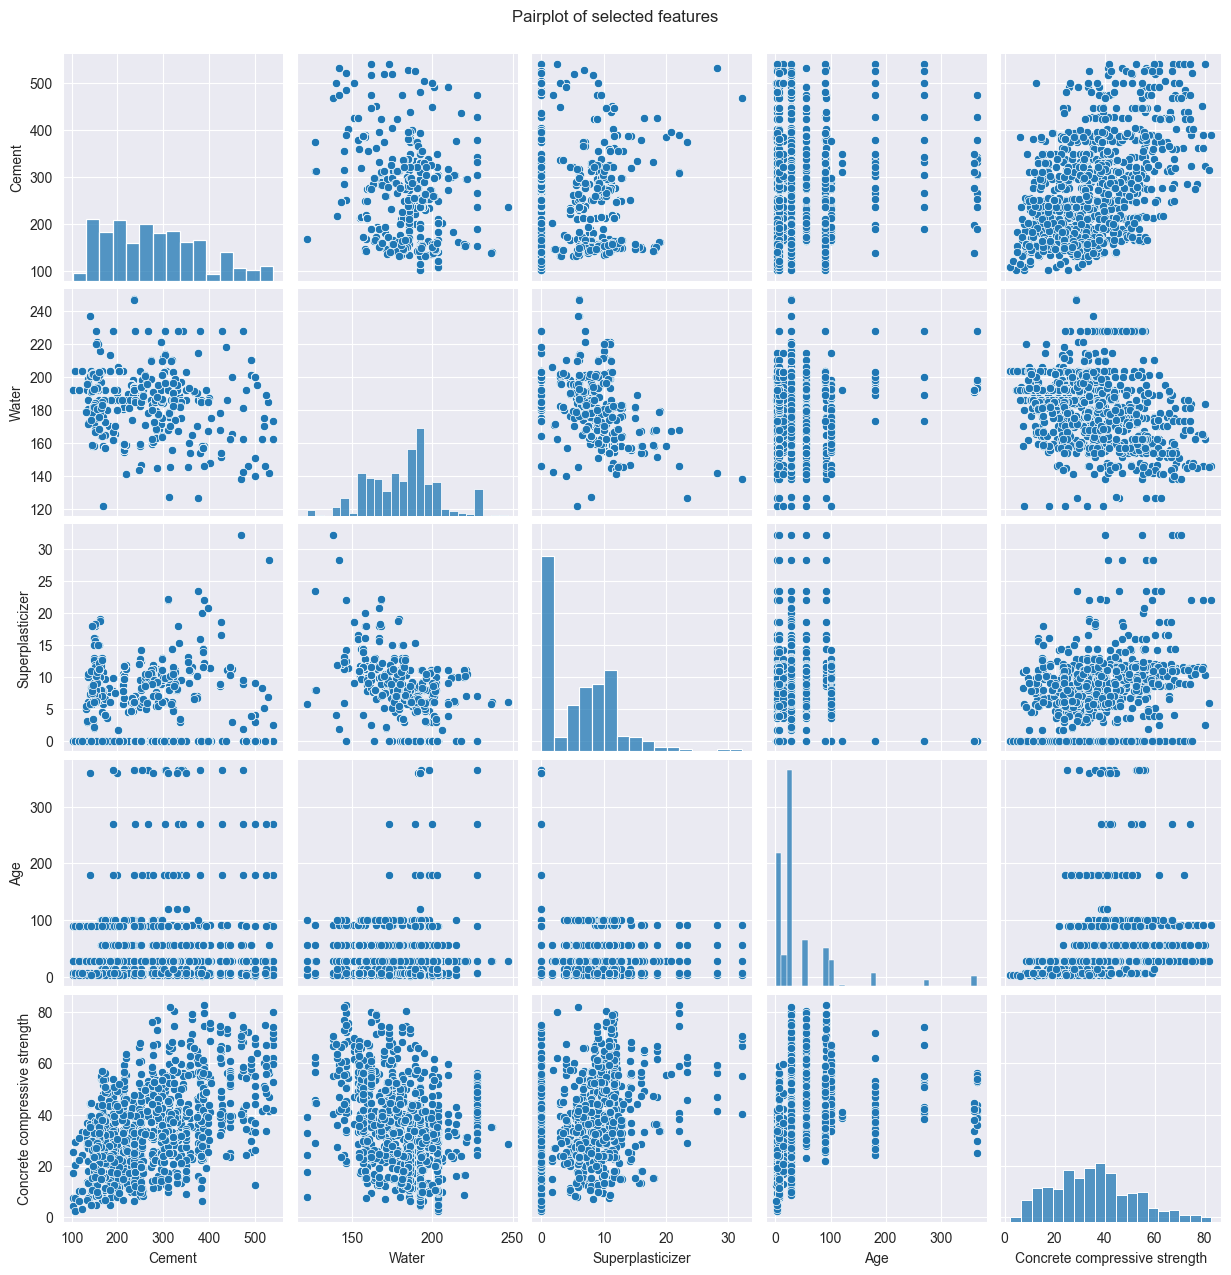

In [13]:
# Exploratory scatter plot
df = pd.concat([X, y], axis=1)

sns.pairplot(df[['Cement', 'Water', 'Superplasticizer', 'Age', 'Concrete compressive strength']])
plt.suptitle("Pairplot of selected features", y=1.02)
plt.show()

In [14]:
# Train-test split
X = concrete_compressive_strength.data.features[['Cement']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

--- GridSearch for Ridge ---
Best alpha: 0.1
Best CV MSE: 214.9438
Test set R²: 0.2505
Test set MSE: 193.1361

--- GridSearch for Lasso ---
Best alpha: 0.0001
Best CV MSE: 214.9442
Test set R²: 0.2504
Test set MSE: 193.1435

--- GridSearch for ElasticNet ---
Best alpha: 0.001
Best CV MSE: 214.9440
Test set R²: 0.2506
Test set MSE: 193.1038

Plain Polynomial Regression (no regularization):
Test set R²: 0.2504
Test set MSE: 193.1449



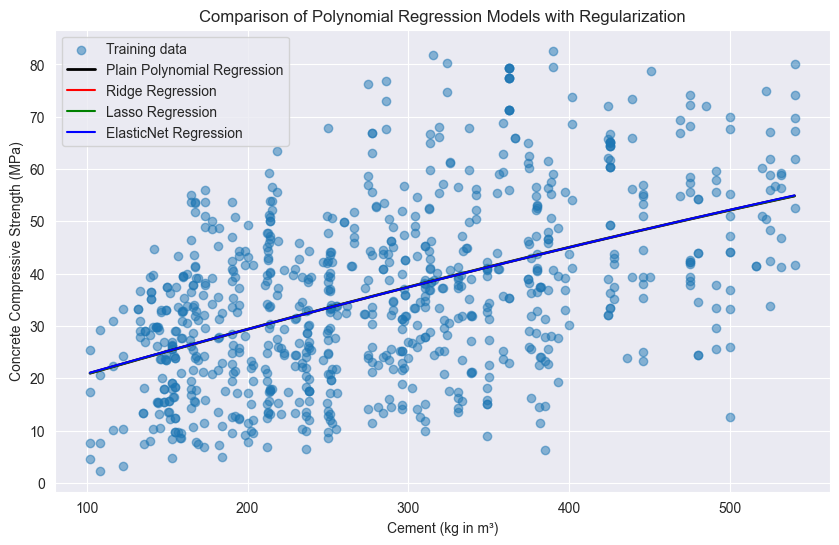

In [15]:
# Pipeline helper
def create_pipeline(model):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

# Models for Grid Search
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=10000),
    'ElasticNet': ElasticNet(max_iter=10000)
}

param_grid = {
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

best_models = {}

for name, base_model in models.items():
    print(f"--- GridSearch for {name} ---")
    pipeline = create_pipeline(base_model)
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    print(f"Best alpha: {grid_search.best_params_['regressor__alpha']}")
    print(f"Best CV MSE: {-grid_search.best_score_:.4f}")
    y_pred = grid_search.predict(X_test)
    print(f"Test set R²: {r2_score(y_test, y_pred):.4f}")
    print(f"Test set MSE: {mean_squared_error(y_test, y_pred):.4f}\n")
    best_models[name] = grid_search.best_estimator_

# Fit a plain polynomial regression model without regularization
plain_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
plain_model.fit(X_train, y_train)
y_pred_plain = plain_model.predict(X_test)
print("Plain Polynomial Regression (no regularization):")
print(f"Test set R²: {r2_score(y_test, y_pred_plain):.4f}")
print(f"Test set MSE: {mean_squared_error(y_test, y_pred_plain):.4f}\n")

# Range for plotting
X_range = np.linspace(X_train['Cement'].min(), X_train['Cement'].max(), 200)
X_range_df = pd.DataFrame(X_range, columns=['Cement'])

plt.figure(figsize=(10, 6))

# Plot training points
plt.scatter(X_train['Cement'], y_train, alpha=0.5, label='Training data')

# Plot predictions of all models
plt.plot(X_range, plain_model.predict(X_range_df), label='Plain Polynomial Regression', color='black', linewidth=2)
plt.plot(X_range, best_models['Ridge'].predict(X_range_df), label='Ridge Regression', color='red')
plt.plot(X_range, best_models['Lasso'].predict(X_range_df), label='Lasso Regression', color='green')
plt.plot(X_range, best_models['ElasticNet'].predict(X_range_df), label='ElasticNet Regression', color='blue')

plt.xlabel('Cement (kg in m³)')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.title('Comparison of Polynomial Regression Models with Regularization')
plt.legend()
plt.grid(True)
plt.show()
